In [3]:
#Importing
import numpy as np
import pandas as pd 
import seaborn as sns 
from functools import reduce
import matplotlib.pyplot as plt
import altair as alt

In [4]:
#Importing the dataset and starting EDA
manager_survey = pd.read_csv('manager_survey_data.csv',  sep = ',')
general_data = pd.read_csv('general_data.csv',  sep = ',')
employee_data = pd.read_csv('employee_survey_data.csv',  sep = ',')

In [5]:
manager_survey.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [6]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [7]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [8]:
#Merging and cleaning data
emp_man = pd.merge(manager_survey, employee_data, on='EmployeeID')
data_hr = pd.merge(emp_man, general_data, on='EmployeeID')

data_hr.head()
data_hr.dropna(inplace=True)
data_hr.isnull().sum()
data_hr.drop(['Over18', 'EmployeeCount', 'StandardHours'], inplace=True, axis=1)

### Changing Datatypes

In [9]:

data_hr = data_hr.astype({'EnvironmentSatisfaction':'int64','JobSatisfaction':'int64','WorkLifeBalance':'int64','NumCompaniesWorked':'int64'})
data_hr['Attrition'] = data_hr['Attrition'].replace(['Yes'],True)
data_hr['Attrition'] = data_hr['Attrition'].replace(['No'],False)

In [10]:
data_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   JobInvolvement           4300 non-null   int64  
 2   PerformanceRating        4300 non-null   int64  
 3   EnvironmentSatisfaction  4300 non-null   int64  
 4   JobSatisfaction          4300 non-null   int64  
 5   WorkLifeBalance          4300 non-null   int64  
 6   Age                      4300 non-null   int64  
 7   Attrition                4300 non-null   bool   
 8   BusinessTravel           4300 non-null   object 
 9   Department               4300 non-null   object 
 10  DistanceFromHome         4300 non-null   int64  
 11  Education                4300 non-null   int64  
 12  EducationField           4300 non-null   object 
 13  Gender                   4300 non-null   object 
 14  JobLevel                

## General EDA

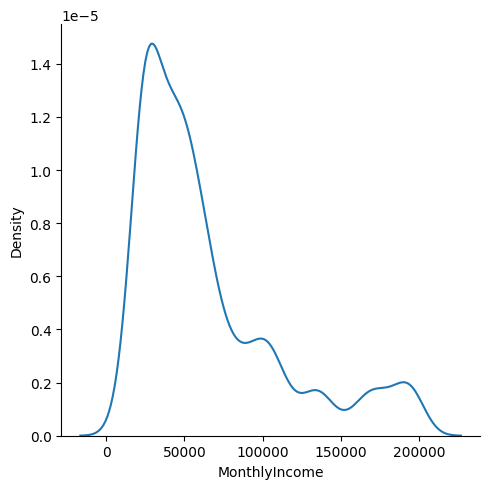

In [11]:
sns.displot(data=data_hr, 
            x="MonthlyIncome",
            kind="kde")

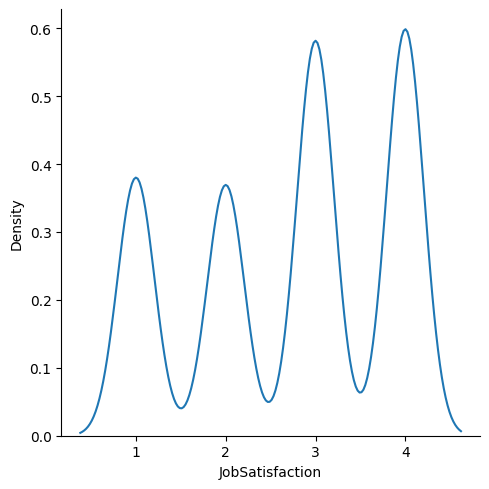

In [12]:
sns.displot(data=data_hr, 
            x="JobSatisfaction",
            kind="kde")

Department
Human Resources           58114.784946
Research & Development    67272.810830
Sales                     61295.485845
Name: MonthlyIncome, dtype: float64

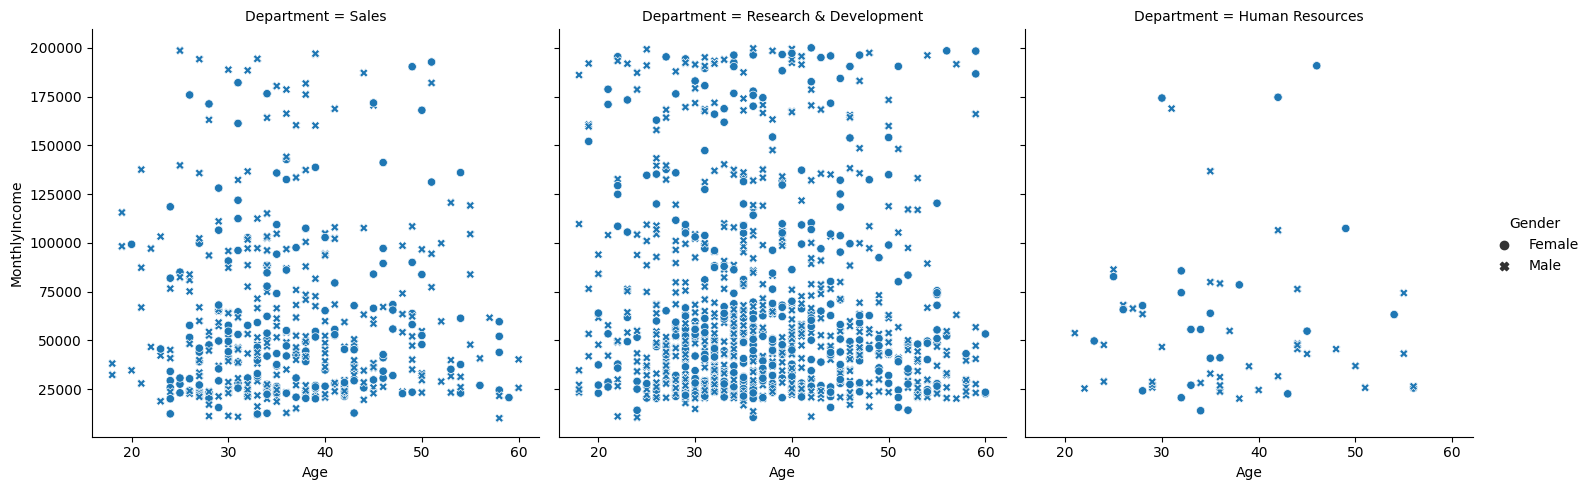

In [13]:
sns.relplot(data=data_hr, 
            x="Age", 
            y="MonthlyIncome",
            kind="scatter",
            col='Department',
            style= 'Gender')

data_hr.groupby('Department').MonthlyIncome.mean()

In [14]:
data_hr.groupby('Attrition').Age.mean()

Attrition
False    37.551734
True     33.686331
Name: Age, dtype: float64

In [15]:
data_hr.groupby('Attrition').JobSatisfaction.mean()

Attrition
False    2.774757
True     2.466187
Name: JobSatisfaction, dtype: float64

In [16]:
data_hr.groupby('Department').JobSatisfaction.mean()

Department
Human Resources           2.693548
Research & Development    2.703598
Sales                     2.775057
Name: JobSatisfaction, dtype: float64

In [17]:
data_hr.head()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3,4,2,51,False,Travel_Rarely,Sales,...,Married,131160,1,11,0,1.0,6,1,0,0
1,2,2,4,3,2,4,31,True,Travel_Frequently,Research & Development,...,Single,41890,0,23,1,6.0,3,5,1,4
2,3,3,3,2,2,1,32,False,Travel_Frequently,Research & Development,...,Married,193280,1,15,3,5.0,2,5,0,3
3,4,2,3,4,4,3,38,False,Non-Travel,Research & Development,...,Married,83210,3,11,3,13.0,5,8,7,5
4,5,3,3,4,1,3,32,False,Travel_Rarely,Research & Development,...,Single,23420,4,12,2,9.0,2,6,0,4


In [18]:
data_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4300 non-null   int64  
 1   JobInvolvement           4300 non-null   int64  
 2   PerformanceRating        4300 non-null   int64  
 3   EnvironmentSatisfaction  4300 non-null   int64  
 4   JobSatisfaction          4300 non-null   int64  
 5   WorkLifeBalance          4300 non-null   int64  
 6   Age                      4300 non-null   int64  
 7   Attrition                4300 non-null   bool   
 8   BusinessTravel           4300 non-null   object 
 9   Department               4300 non-null   object 
 10  DistanceFromHome         4300 non-null   int64  
 11  Education                4300 non-null   int64  
 12  EducationField           4300 non-null   object 
 13  Gender                   4300 non-null   object 
 14  JobLevel                

## Correlation Matrix

C:\Users\maart\AppData\Local\Temp\ipykernel_16872\110600581.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_hr.corr()


<AxesSubplot: >

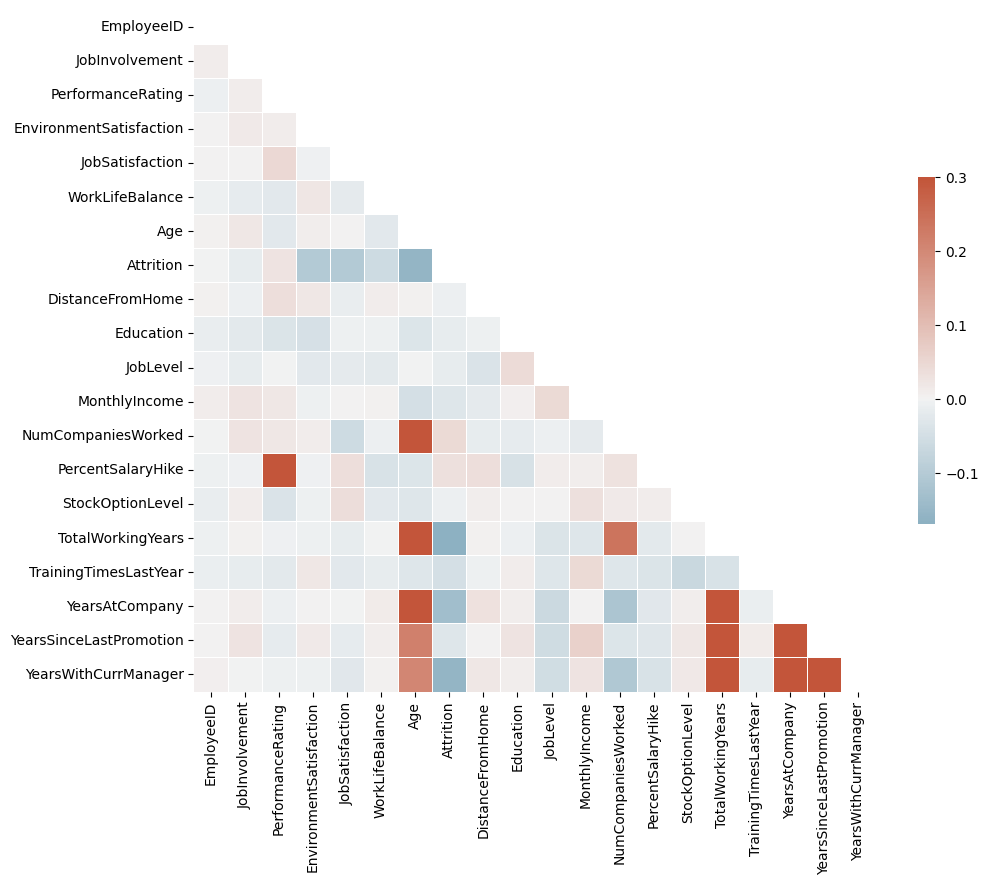

In [19]:
#quick correlation check

# Compute the correlation matrix
corr = data_hr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## UML

In [20]:
print(data_hr)

      EmployeeID  JobInvolvement  PerformanceRating  EnvironmentSatisfaction  \
0              1               3                  3                        3   
1              2               2                  4                        3   
2              3               3                  3                        2   
3              4               2                  3                        4   
4              5               3                  3                        4   
...          ...             ...                ...                      ...   
4404        4405               2                  3                        3   
4405        4406               3                  3                        4   
4406        4407               2                  3                        4   
4407        4408               3                  4                        1   
4408        4409               2                  3                        4   

      JobSatisfaction  WorkLifeBalance 

In [21]:
#Making a dataframe with no text for UML model
data_to_cluster = data_hr[['Attrition', 'JobSatisfaction', 'EmployeeID', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [22]:
data_to_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4300 non-null   bool   
 1   JobSatisfaction          4300 non-null   int64  
 2   EmployeeID               4300 non-null   int64  
 3   StockOptionLevel         4300 non-null   int64  
 4   TotalWorkingYears        4300 non-null   float64
 5   TrainingTimesLastYear    4300 non-null   int64  
 6   YearsAtCompany           4300 non-null   int64  
 7   JobInvolvement           4300 non-null   int64  
 8   PerformanceRating        4300 non-null   int64  
 9   EnvironmentSatisfaction  4300 non-null   int64  
 10  WorkLifeBalance          4300 non-null   int64  
 11  Age                      4300 non-null   int64  
 12  DistanceFromHome         4300 non-null   int64  
 13  Education                4300 non-null   int64  
 14  JobLevel                

In [23]:
#Importing UML packages
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
# learn x-y relationships (principal components) and transform
data_to_cluster_scaled = scaler.fit_transform(data_to_cluster)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler()

In [26]:
data_to_cluster_minmax = scaler_min_max.fit_transform(data_to_cluster)

In [27]:
data_to_cluster

,Attrition,JobSatisfaction,EmployeeID,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,YearsSinceLastPromotion,YearsWithCurrManager
0,False,4,1,0,1.0,6,1,3,3,3,2,51,6,2,1,131160,1,11,0,0
1,True,2,2,1,6.0,3,5,2,4,3,4,31,10,1,1,41890,0,23,1,4
2,False,2,3,3,5.0,2,5,3,3,2,1,32,17,4,4,193280,1,15,0,3
3,False,4,4,3,13.0,5,8,2,3,4,3,38,2,5,3,83210,3,11,7,5
4,False,1,5,2,9.0,2,6,3,3,4,3,32,10,1,1,23420,4,12,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,False,4,4405,0,6.0,2,6,2,3,3,3,29,4,3,2,35390,1,18,1,5
4405,False,1,4406,1,10.0,5,3,3,3,4,3,42,5,4,1,60290,3,17,0,2
4406,False,4,4407,0,10.0,2,3,2,3,4,3,29,2,4,1,26790,2,15,0,2
4407,False,3,4408,0,5.0,4,4,3,4,1,3,25,25,2,2,37020,0,20,1,2


### PCA

In [28]:
# load up and instantiate PCS
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [29]:
# fit-transform the data
data_reduced_pca = pca.fit_transform(data_to_cluster_scaled)

In [30]:
print(pca.components_)

[[-0.13996323 -0.007644    0.00203781  0.00595675  0.47788269 -0.0141149
   0.50689213  0.01433594 -0.03090152  0.01166574  0.00817417  0.34672643
   0.01428401  0.00199901 -0.04766924  0.00377116  0.04623493 -0.04587853
   0.40551331  0.44948948]
 [ 0.0381798   0.07177682  0.00087066 -0.00251722  0.04954134 -0.05535075
   0.02417846  0.01622772  0.69560192  0.0034266  -0.06177542  0.02958012
   0.05526299 -0.07887897  0.00426323  0.0089982   0.06592164  0.69606395
   0.01087553  0.01040913]]


In [31]:
pca.components_.shape

(2, 20)

In [32]:
print(pca.explained_variance_ratio_)

[0.15133054 0.08953644]


In [33]:
#sns.scatterplot(data_reduced_pca[:,0],data_reduced_pca[:,2])

In [34]:
vis_data = pd.DataFrame(data_reduced_pca)
vis_data['EmployeeID'] = data_hr['EmployeeID']
vis_data['Department'] = data_hr['Department']
vis_data.columns = ['x', 'y', 'EmployeeID', 'Department']

In [35]:
# alt.Chart(vis_data).mark_circle(size=60).encode(
#     x='x',
#     y='y',
#     tooltip=['EmployeeID', 'Department']
# ).interactive()

<AxesSubplot: >

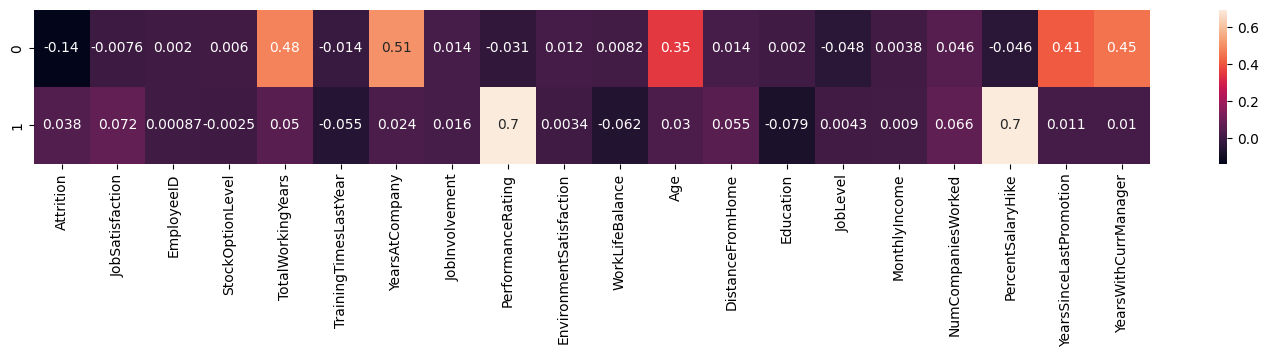

In [36]:
plt.figure(figsize=(18,2))
sns.heatmap(pd.DataFrame(pca.components_, columns=data_to_cluster.columns), annot=True)

### NMF

In [37]:
# import nmf
from sklearn.decomposition import NMF

In [38]:
# instantiate with 4 components
nmf = NMF(n_components=4)

In [39]:
# notice, we are using the min-max scaled data
data_reduced_nmf = nmf.fit_transform(data_to_cluster_minmax)

c:\Users\maart\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [40]:
data_reduced_nmf.shape

(4300, 4)

In [41]:
nmf.components_.shape

(4, 20)

<AxesSubplot: >

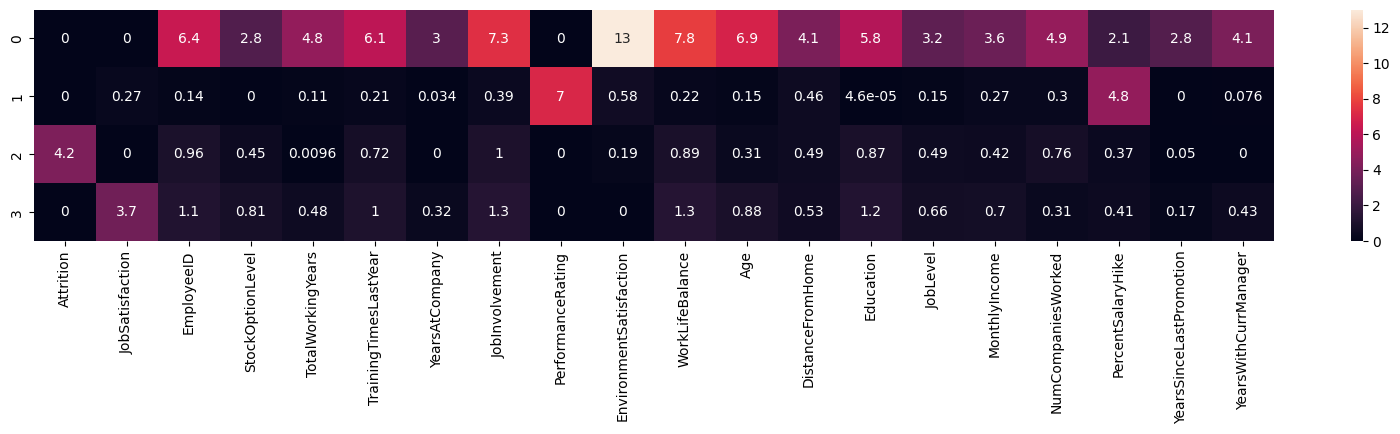

In [42]:
plt.figure(figsize=(20,3))
sns.heatmap(pd.DataFrame(nmf.components_, columns=data_to_cluster.columns), annot=True)

### Modern Algorithms

In [43]:
import umap

c:\Users\maart\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [44]:
# we totally could specify more than 2 dimensions (as well as some other parameters)
umap_scaler = umap.UMAP()

In [45]:
# umap accepts standard-scaled data
embeddings = umap_scaler.fit_transform(data_to_cluster_scaled)

In [46]:
#sns.scatterplot(embeddings[:,0],embeddings[:,1])

In [47]:
vis_data = pd.DataFrame(embeddings)
vis_data['EmployeeID'] = data_hr['EmployeeID']
vis_data['Department'] = data_hr['Department']
vis_data.columns = ['x', 'y', 'EmployeeID', 'Department']

In [48]:
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['EmployeeID', 'Department']
).interactive()

c:\Users\maart\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [49]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=3)

In [50]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_to_cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)

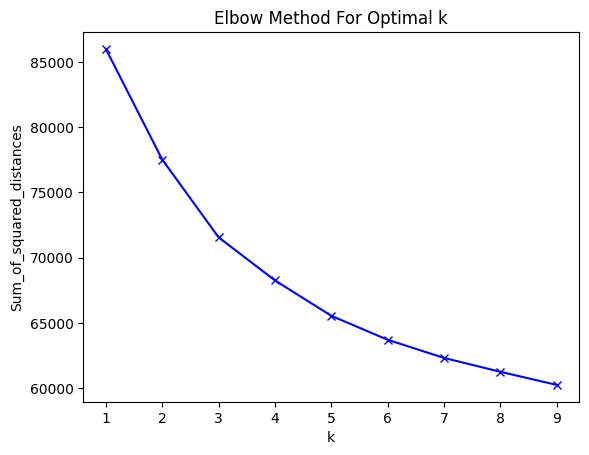

In [51]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

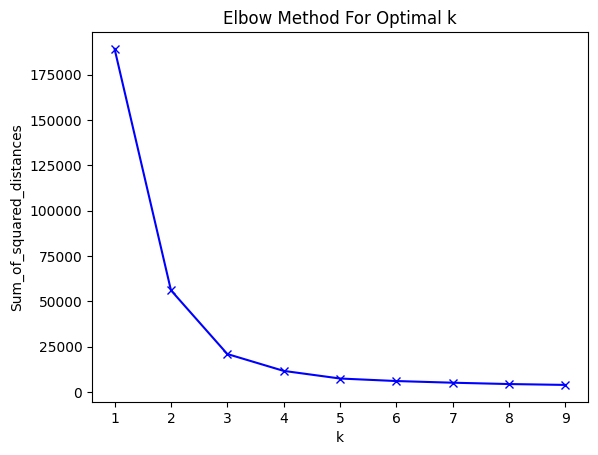

In [52]:
umap_scaler_km = umap.UMAP(n_components=6)
embeddings_km = umap_scaler.fit_transform(data_to_cluster_scaled)


Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(embeddings_km)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [53]:
# back to our k-means instance. We take 3 clusters on non-reduced data
clusterer = KMeans(n_clusters=3, random_state=0, n_init=10)
label = clusterer.fit_predict(embeddings)
centroids = clusterer.cluster_centers_

vis_data = pd.DataFrame(embeddings)
vis_data['EmployeeID'] = data_hr['EmployeeID']
vis_data['Department'] = data_hr['Department']
vis_data.columns = ['x', 'y', 'EmployeeID', 'Department']

[2 1 2 ... 2 1 2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   x           4300 non-null   float32
 1   y           4300 non-null   float32
 2   EmployeeID  4195 non-null   float64
 3   Department  4195 non-null   object 
 4   label       4300 non-null   int32  
dtypes: float32(2), float64(1), int32(1), object(1)
memory usage: 117.7+ KB


,x,y,EmployeeID,Department,label
0,12.062945,11.424101,1.0,Sales,2
1,-1.989843,6.326729,2.0,Research & Development,1
2,13.316010,11.936265,3.0,Research & Development,2
3,9.296031,9.817137,4.0,Research & Development,2
4,15.017358,8.938496,5.0,Research & Development,2


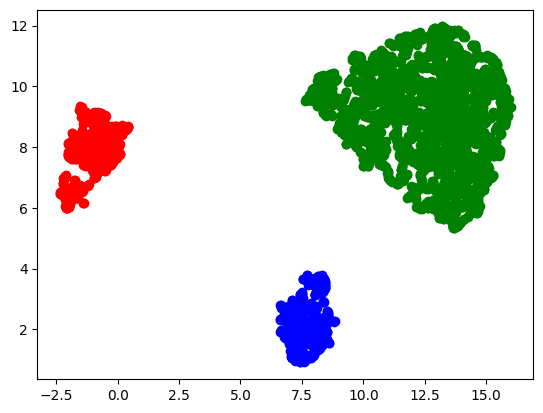

In [54]:
print(label)
df_t = pd.DataFrame(data=embeddings, columns=['x', 'y'])
df_t['EmployeeID'] = data_hr['EmployeeID']
df_t['Department'] = data_hr['Department']
df_t.columns = ['x', 'y', 'EmployeeID', 'Department']
df_t['label'] = label
only_0 = df_t[df_t['label'] == 0]
only_1 = df_t[df_t['label'] == 1]
only_2 = df_t[df_t['label'] == 2]

plt.scatter(only_0['x'], only_0['y'], color='blue')
plt.scatter(only_1['x'], only_1['y'], color='red')
plt.scatter(only_2['x'],only_2['y'], color ='green')
df_t.info()
df_t.head()

In [55]:
df_t

,x,y,EmployeeID,Department,label
0,12.062945,11.424101,1.0,Sales,2
1,-1.989843,6.326729,2.0,Research & Development,1
2,13.316010,11.936265,3.0,Research & Development,2
3,9.296031,9.817137,4.0,Research & Development,2
4,15.017358,8.938496,5.0,Research & Development,2
...,...,...,...,...,...
4295,12.581014,9.898179,4296.0,Sales,2
4296,15.411971,9.757166,4297.0,Sales,2
4297,13.306356,9.721845,4298.0,Research & Development,2
4298,-1.159506,7.541469,4299.0,Sales,1


### EDA for the clusters 

In [56]:
vis_cluster = pd.merge(data_hr, df_t, on='EmployeeID')

In [57]:
#Get an idea of how many entries there is in every cluster 
vis_cluster.head()
vis_cluster['label'].value_counts().nlargest()

2    3036
1     640
0     519
Name: label, dtype: int64

In [58]:
label_0 = vis_cluster[vis_cluster['label'] <= 0]
label_1 = vis_cluster[vis_cluster['label'] <= 1]
label_2 = vis_cluster[vis_cluster['label'] <= 2]


In [59]:
label_0['label'].value_counts()
label_1['label'].value_counts()
label_2['label'].value_counts()


2    3036
1     640
0     519
Name: label, dtype: int64

In [60]:
label_0.groupby(['Attrition'])['Age','Gender'].value_counts().nlargest()

C:\Users\maart\AppData\Local\Temp\ipykernel_16872\2505537835.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  label_0.groupby(['Attrition'])['Age','Gender'].value_counts().nlargest()


Attrition  Age  Gender
False      34   Male      19
           27   Male      16
           35   Female    16
           32   Male      15
           35   Male      14
dtype: int64

<AxesSubplot: title={'center': 'Hidden Groups'}>

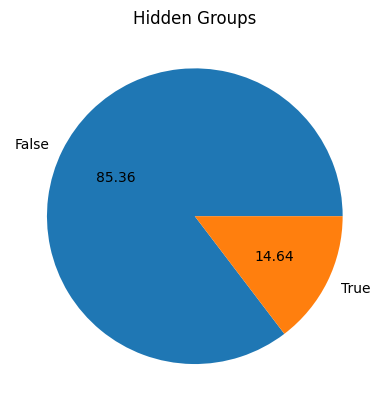

In [83]:
label_0.groupby('Attrition').size().plot(kind='pie', autopct='%.2f', title='Hidden Groups')

<AxesSubplot: title={'center': 'Hidden Groups'}>

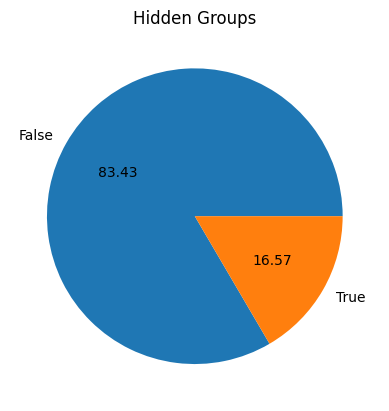

In [82]:
label_1.groupby('Attrition').size().plot(kind='pie', autopct='%.2f', title='Hidden Groups')


<AxesSubplot: title={'center': 'Hidden Groups'}>

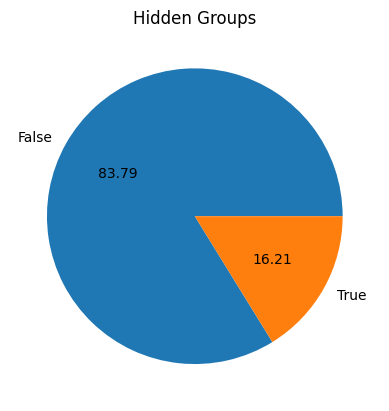

In [81]:
label_2.groupby('Attrition').size().plot(kind='pie', autopct='%.2f', title='Hidden Groups')

In [90]:
label_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519 entries, 11 to 4188
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               519 non-null    int64  
 1   JobInvolvement           519 non-null    int64  
 2   PerformanceRating        519 non-null    int64  
 3   EnvironmentSatisfaction  519 non-null    int64  
 4   JobSatisfaction          519 non-null    int64  
 5   WorkLifeBalance          519 non-null    int64  
 6   Age                      519 non-null    int64  
 7   Attrition                519 non-null    bool   
 8   BusinessTravel           519 non-null    object 
 9   Department_x             519 non-null    object 
 10  DistanceFromHome         519 non-null    int64  
 11  Education                519 non-null    int64  
 12  EducationField           519 non-null    object 
 13  Gender                   519 non-null    object 
 14  JobLevel                

# SML
### Feature engineering
##### Binning

In [61]:
pd.cut(data_hr['Age'], bins=[18, 25, 30, 40, 50, 60, np.inf])

0       (50.0, 60.0]
1       (30.0, 40.0]
2       (30.0, 40.0]
3       (30.0, 40.0]
4       (30.0, 40.0]
            ...     
4404    (25.0, 30.0]
4405    (40.0, 50.0]
4406    (25.0, 30.0]
4407    (18.0, 25.0]
4408    (40.0, 50.0]
Name: Age, Length: 4300, dtype: category
Categories (6, interval[float64, right]): [(18.0, 25.0] < (25.0, 30.0] < (30.0, 40.0] < (40.0, 50.0] < (50.0, 60.0] < (60.0, inf]]

In [62]:
#income_groups = pd.cut(data_hr['MonthlyIncome'], bins=[10000, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, np.inf])

In [63]:
pd.cut(data_hr['TotalWorkingYears'], bins=[0,5, 10, 15, 20, 25, 30, 35, 40])

0         (0, 5]
1        (5, 10]
2         (0, 5]
3       (10, 15]
4        (5, 10]
          ...   
4404     (5, 10]
4405     (5, 10]
4406     (5, 10]
4407      (0, 5]
4408     (5, 10]
Name: TotalWorkingYears, Length: 4300, dtype: category
Categories (8, interval[int64, right]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] < (20, 25] < (25, 30] < (30, 35] < (35, 40]]

In [64]:
pd.cut(data_hr['YearsAtCompany'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40])

0        (0, 5]
1        (0, 5]
2        (0, 5]
3       (5, 10]
4       (5, 10]
         ...   
4404    (5, 10]
4405     (0, 5]
4406     (0, 5]
4407     (0, 5]
4408    (5, 10]
Name: YearsAtCompany, Length: 4300, dtype: category
Categories (8, interval[int64, right]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] < (20, 25] < (25, 30] < (30, 35] < (35, 40]]

In [65]:
data_hr ['YearsWithCurrManager-b'] = pd.cut(data_hr['YearsWithCurrManager'], bins=[0, 5, 10, 15, np.inf])

In [66]:
data_hr

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,YearsWithCurrManager-b
0,1,3,3,3,4,2,51,False,Travel_Rarely,Sales,...,131160,1,11,0,1.0,6,1,0,0,NaN
1,2,2,4,3,2,4,31,True,Travel_Frequently,Research & Development,...,41890,0,23,1,6.0,3,5,1,4,"(0.0, 5.0]"
2,3,3,3,2,2,1,32,False,Travel_Frequently,Research & Development,...,193280,1,15,3,5.0,2,5,0,3,"(0.0, 5.0]"
3,4,2,3,4,4,3,38,False,Non-Travel,Research & Development,...,83210,3,11,3,13.0,5,8,7,5,"(0.0, 5.0]"
4,5,3,3,4,1,3,32,False,Travel_Rarely,Research & Development,...,23420,4,12,2,9.0,2,6,0,4,"(0.0, 5.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3,4,3,29,False,Travel_Rarely,Sales,...,35390,1,18,0,6.0,2,6,1,5,"(0.0, 5.0]"
4405,4406,3,3,4,1,3,42,False,Travel_Rarely,Research & Development,...,60290,3,17,1,10.0,5,3,0,2,"(0.0, 5.0]"
4406,4407,2,3,4,4,3,29,False,Travel_Rarely,Research & Development,...,26790,2,15,0,10.0,2,3,0,2,"(0.0, 5.0]"
4407,4408,3,4,1,3,3,25,False,Travel_Rarely,Research & Development,...,37020,0,20,0,5.0,4,4,1,2,"(0.0, 5.0]"


In [67]:
data_hr[data_hr['EmployeeID'] == 1]

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,YearsWithCurrManager-b
0,1,3,3,3,4,2,51,False,Travel_Rarely,Sales,...,131160,1,11,0,1.0,6,1,0,0,NaN


In [68]:
selected_sml_df = data_hr[['Age','TotalWorkingYears','YearsAtCompany','YearsWithCurrManager','EnvironmentSatisfaction','JobSatisfaction','Attrition']]

In [69]:
selected_sml_df

,Age,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,Attrition
0,51,1.0,1,0,3,4,False
1,31,6.0,5,4,3,2,True
2,32,5.0,5,3,2,2,False
3,38,13.0,8,5,4,4,False
4,32,9.0,6,4,4,1,False
...,...,...,...,...,...,...,...
4404,29,6.0,6,5,3,4,False
4405,42,10.0,3,2,4,1,False
4406,29,10.0,3,2,4,4,False
4407,25,5.0,4,2,1,3,False


In [70]:
X = selected_sml_df.iloc[:,:-1]

y = selected_sml_df.Attrition

#from sklearn.preprocessing import OneHotEncoder

#import itertools

#ohe_X = OneHotEncoder(sparse=False)
#sparse could be True - we don't know

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [72]:
transformed_nummerical = scaler.fit_transform(X.iloc[:,:])

X.iloc[:,:] = transformed_nummerical

In [73]:
X

,Age,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction
0,1.538800,-1.320442,-0.980272,-1.159067,0.252403,1.157359
1,-0.648079,-0.678523,-0.329582,-0.037179,0.252403,-0.657940
2,-0.538735,-0.806907,-0.329582,-0.317651,-0.661946,-0.657940
3,0.117329,0.220163,0.158435,0.243293,1.166752,1.157359
4,-0.538735,-0.293372,-0.166910,-0.037179,1.166752,-1.565590
...,...,...,...,...,...,...
4404,-0.866767,-0.678523,-0.166910,0.243293,0.252403,1.157359
4405,0.554704,-0.164988,-0.654927,-0.598123,1.166752,-1.565590
4406,-0.866767,-0.164988,-0.654927,-0.598123,1.166752,1.157359
4407,-1.304143,-0.806907,-0.492255,-0.598123,-1.576295,0.249709


In [74]:
X.index = range(len(X))

In [75]:
X.index

RangeIndex(start=0, stop=4300, step=1)

### Spliting and preparing for ML

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:
!pip install xgboost -U -q

from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

model_xgb = XGBRegressor()

model_xgb.fit(X_train, y_train)

'pip' is not recognized as an internal or external command,
operable program or batch file.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [78]:
print('Model XGB' + ' ' + str(model_xgb.score(X_train, y'_train)))

SyntaxError: unterminated string literal (detected at line 1) (4248552179.py, line 1)

In [ ]:
data_hr['Attrition'].value_counts()

In [ ]:
y_pred_train = model_xgb.predict(X_train)

mean_squared_error(y_train, y_pred_train, squared=False)

In [ ]:
len(y_pred_train)

In [ ]:
y_pred_train

In [ ]:
y_pred_train = model_xgb.predict(X_train)

mean_squared_error(y_train, y_pred_train, squared=False)

In [ ]:
feat_importances = pd.Series(model_xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model_xgb)

shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, plot_type="bar")

shap.summary_plot(shap_values, X)

shap.dependence_plot("TotalWorkingYears", shap_values, X)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:])